# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [5]:
# Build query URL
#using current weather api. Would prefer to use statistical daily api, https://openweathermap.org/api/statistics-api#day
#with an equinox date, September 22, so there are no extremes of summmer/winter in either hemisphere
#but the statistical api is not part of the free plan
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&units=imperial&q=" 

#record counter
count = 1

#blank lists for data
cloudiness=[]
country=[]
date=[]
humidity=[]
max_temp=[]
wind_speed=[]
long=[]
lati=[]
cities_found=[]

print(f"Beginning Data Retrieval:\n-----------------------------")

#loop through each city and append appropriate data
for city in cities:    
    try:
        weather_json = requests.get(query_url + city).json()
        
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])   
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        long.append(weather_json['coord']['lon'])
        lati.append(weather_json['coord']['lat'])
        cities_found.append(weather_json['name'])
        
        print(f"Processing Record {count} | {city}")
        count += 1
        
    except:
        print(f"City {city} not found. Skipping...")
        pass

Beginning Data Retrieval:
-----------------------------
Processing Record 1 | cidreira
Processing Record 2 | vila franca do campo
Processing Record 3 | beringovskiy
Processing Record 4 | qaanaaq
Processing Record 5 | ponta do sol
Processing Record 6 | busselton
Processing Record 7 | gouyave
Processing Record 8 | buenaventura
Processing Record 9 | zhigansk
Processing Record 10 | yellowknife
Processing Record 11 | ribeira grande
Processing Record 12 | mount gambier
Processing Record 13 | ndele
City marcona not found. Skipping...
Processing Record 14 | saldanha
Processing Record 15 | khatanga
Processing Record 16 | port alfred
Processing Record 17 | bengkulu
Processing Record 18 | kitob
Processing Record 19 | guerrero negro
Processing Record 20 | zhoucheng
Processing Record 21 | severo-kurilsk
Processing Record 22 | medicine hat
Processing Record 23 | bredasdorp
Processing Record 24 | jamestown
Processing Record 25 | new norfolk
Processing Record 26 | anadyr
Processing Record 27 | ancud
C

Processing Record 226 | mangaluru
Processing Record 227 | linxia
Processing Record 228 | lubao
Processing Record 229 | emba
Processing Record 230 | ust-ishim
Processing Record 231 | mutis
Processing Record 232 | formosa do rio preto
Processing Record 233 | najran
Processing Record 234 | fairview
Processing Record 235 | kuching
Processing Record 236 | kutum
Processing Record 237 | arman
Processing Record 238 | tukrah
Processing Record 239 | derbent
Processing Record 240 | pecos
City samusu not found. Skipping...
Processing Record 241 | alamosa
Processing Record 242 | sindhnur
Processing Record 243 | mayumba
Processing Record 244 | maposeni
Processing Record 245 | port hardy
Processing Record 246 | ambon
Processing Record 247 | gamba
Processing Record 248 | humaita
Processing Record 249 | ambovombe
Processing Record 250 | yinchuan
Processing Record 251 | north bend
Processing Record 252 | kaitangata
Processing Record 253 | acambay
City wulanhaote not found. Skipping...
Processing Record 

Processing Record 456 | luganville
Processing Record 457 | la reforma
Processing Record 458 | chlorakas
Processing Record 459 | yanam
Processing Record 460 | palestine
City nizhneyansk not found. Skipping...
Processing Record 461 | telenesti
Processing Record 462 | owando
Processing Record 463 | mackay
Processing Record 464 | marrakesh
Processing Record 465 | san rafael
Processing Record 466 | abu samrah
Processing Record 467 | tahoua
Processing Record 468 | picos
Processing Record 469 | buzuluk
Processing Record 470 | angoche
Processing Record 471 | benghazi
Processing Record 472 | curaca
Processing Record 473 | clinton
Processing Record 474 | sitrah
Processing Record 475 | chake chake
Processing Record 476 | sihora
Processing Record 477 | florianopolis
Processing Record 478 | selenginsk
Processing Record 479 | harper
Processing Record 480 | acapulco
Processing Record 481 | nouadhibou
Processing Record 482 | ilulissat
Processing Record 483 | kismayo
Processing Record 484 | male
City s

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#make data frame
city_weather_df = pd.DataFrame({
    'City': cities_found,
    'Lat': lati,
    'Lng': long,
    'Max Temp':max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed':wind_speed,
    'Country': country,
    'Date':date
})

#display DF
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cidreira,-30.1811,-50.2056,73.04,68,0,9.42,BR,1635364075
1,Vila Franca do Campo,37.7167,-25.4333,66.61,90,100,9.06,PT,1635364075
2,Beringovskiy,63.0500,179.3167,6.96,86,92,16.42,RU,1635364075
3,Qaanaaq,77.4840,-69.3632,20.75,94,100,11.21,GL,1635363977
4,Ponta do Sol,32.6667,-17.1000,70.43,61,7,3.18,PT,1635364075


In [7]:
#export DF to csv file
city_weather_df.to_csv("../" + output_data_file, index=False)

In [8]:
#summary stats for df
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,5.820000e+02
mean,20.032366,17.202788,60.568849,71.749141,53.951890,7.559175,1.635364e+09
std,32.887438,89.415424,21.874595,20.084562,39.860442,5.442677,6.963305e+01
min,-54.800000,-175.200000,-22.360000,9.000000,0.000000,0.000000,1.635364e+09
25%,-5.179325,-61.467975,47.580000,62.000000,11.000000,3.580000,1.635364e+09
50%,22.852150,24.740700,66.370000,76.000000,64.500000,6.275000,1.635364e+09
75%,47.642500,92.963300,77.492500,87.000000,96.000000,10.252500,1.635364e+09
max,78.218600,179.316700,96.780000,100.000000,100.000000,39.120000,1.635364e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [9]:
x_latitude = city_weather_df["Lat"]

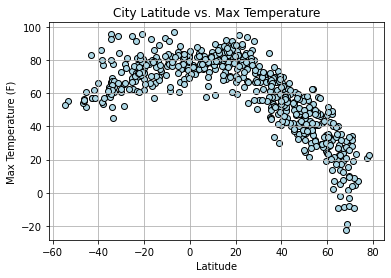

In [10]:
plt.scatter(x_latitude, city_weather_df["Max Temp"], facecolor="lightblue", edgecolor="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

plt.savefig("../output_data/max_temp")

## Latitude vs. Humidity Plot

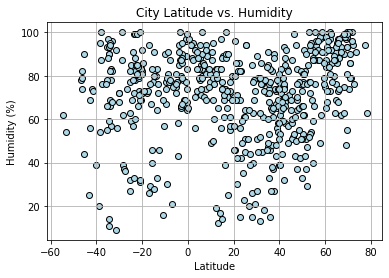

In [11]:
plt.scatter(x_latitude, city_weather_df["Humidity"], facecolor="lightblue", edgecolor="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("../output_data/humidity")

## Latitude vs. Cloudiness Plot

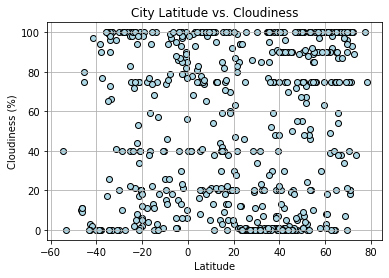

In [12]:
plt.scatter(x_latitude, city_weather_df["Cloudiness"], facecolor="lightblue", edgecolor="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("../output_data/Cloudiness")

## Latitude vs. Wind Speed Plot

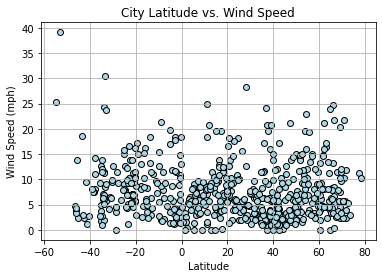

In [13]:
plt.scatter(x_latitude, city_weather_df["Wind Speed"], facecolor="lightblue", edgecolor="black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("../output_data/wind_speed")

## Linear Regression

In [14]:
#separate latitude into north (>=0) and south (<0) for x axes
x_north_lat = x_latitude.loc[x_latitude >= 0]
x_south_lat = x_latitude.loc[x_latitude < 0]

In [15]:
#set columns as variables for y axes
y_north_max_temp = city_weather_df["Max Temp"].loc[city_weather_df["Lat"] >= 0]
y_south_max_temp = city_weather_df["Max Temp"].loc[city_weather_df["Lat"] < 0]

y_north_humid = city_weather_df["Humidity"].loc[city_weather_df["Lat"] >= 0]
y_south_humid = city_weather_df["Humidity"].loc[city_weather_df["Lat"] < 0]

y_north_cloudy = city_weather_df["Cloudiness"].loc[city_weather_df["Lat"] >= 0]
y_south_cloudy = city_weather_df["Cloudiness"].loc[city_weather_df["Lat"] < 0]

y_north_wind_speed = city_weather_df["Wind Speed"].loc[city_weather_df["Lat"] >= 0]
y_south_wind_speed = city_weather_df["Wind Speed"].loc[city_weather_df["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.87448


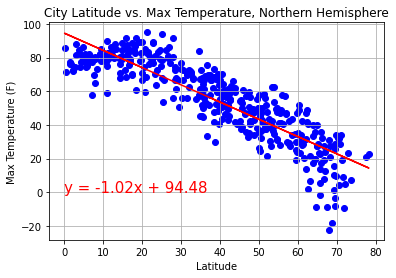

In [16]:
plt.scatter(x_north_lat, y_north_max_temp, facecolor="blue")
plt.title("City Latitude vs. Max Temperature, Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north_lat, y_north_max_temp)
regress_values = x_north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_north_lat,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.51811


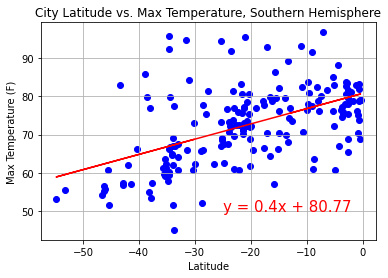

In [17]:
plt.scatter(x_south_lat, y_south_max_temp, facecolor="blue")
plt.title("City Latitude vs. Max Temperature, Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_lat, y_south_max_temp)
regress_values = x_south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_south_lat,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.19413


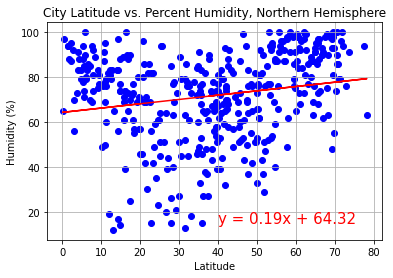

In [18]:
plt.scatter(x_north_lat, y_north_humid, facecolor="blue")
plt.title("City Latitude vs. Percent Humidity, Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north_lat, y_north_humid)
regress_values = x_north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_north_lat,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.12941


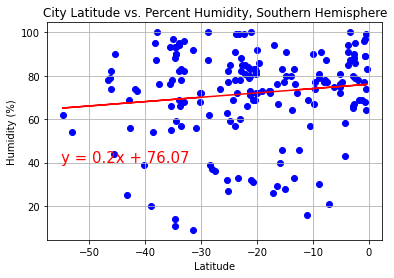

In [19]:
plt.scatter(x_south_lat, y_south_humid, facecolor="blue")
plt.title("City Latitude vs. Percent Humidity, Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_lat, y_south_humid)
regress_values = x_south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_south_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.13683


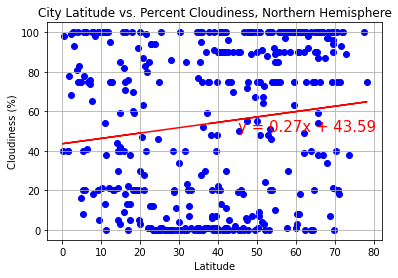

In [20]:
plt.scatter(x_north_lat, y_north_cloudy, facecolor="blue")
plt.title("City Latitude vs. Percent Cloudiness, Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north_lat, y_north_cloudy)
regress_values = x_north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_north_lat,regress_values,"r-")
plt.annotate(line_eq,(45,50),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.10525


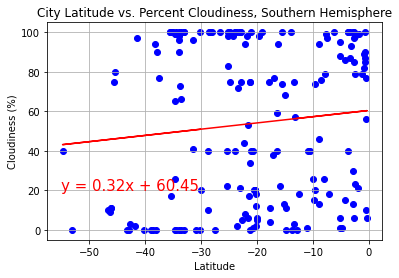

In [21]:
plt.scatter(x_south_lat, y_south_cloudy, facecolor="blue")
plt.title("City Latitude vs. Percent Cloudiness, Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_lat, y_south_cloudy)
regress_values = x_south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_south_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.09593


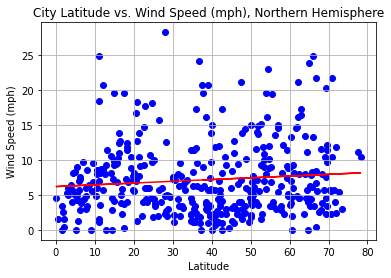

In [22]:
plt.scatter(x_north_lat, y_north_wind_speed, facecolor="blue")
plt.title("City Latitude vs. Wind Speed (mph), Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north_lat, y_north_wind_speed)
regress_values = x_north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_north_lat,regress_values,"r-")
plt.annotate(line_eq,(0,33),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.12779


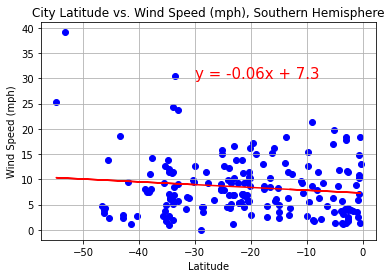

In [23]:
plt.scatter(x_south_lat, y_south_wind_speed, facecolor="blue")
plt.title("City Latitude vs. Wind Speed (mph), Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south_lat, y_south_wind_speed)
regress_values = x_south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_south_lat,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
print(f"The r value is: {round(rvalue, 5)}")